<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework-2---Foundations-of-Biomedical-Computing" data-toc-modified-id="Homework-2---Foundations-of-Biomedical-Computing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework 2 - Foundations of Biomedical Computing</a></span></li><li><span><a href="#It's-the-Love-Data-Games-Competition!" data-toc-modified-id="It's-the-Love-Data-Games-Competition!-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>It's the Love Data Games Competition!</a></span><ul class="toc-item"><li><span><a href="#Score-summary-for-St-Louis-teams" data-toc-modified-id="Score-summary-for-St-Louis-teams-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Score summary for St Louis teams</a></span></li><li><span><a href="#Clean-up-the-leaderboard" data-toc-modified-id="Clean-up-the-leaderboard-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clean up the leaderboard</a></span></li><li><span><a href="#Join-the-leaderboard" data-toc-modified-id="Join-the-leaderboard-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Join the leaderboard</a></span></li><li><span><a href="#Determine-a-winner" data-toc-modified-id="Determine-a-winner-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Determine a winner</a></span></li></ul></li><li><span><a href="#Bacterial-example" data-toc-modified-id="Bacterial-example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bacterial example</a></span></li></ul></div>

# Homework 2 - Foundations of Biomedical Computing


# It's the Love Data Games Competition!

Biomedical Data Scientists from all over the world are competing on the same day to build community and raise money for ventures that improve access to health care worldwide.  Two teams from St. Louis, the Bread-Sliced Bagels and the Toasted Raviolis, have entered.  You'll need their earlier results to finish this.

_____

The first two problems are taken directly from WS4 - you can copy your answers here. 

## Score summary for St Louis teams

1a. Five more games take place: Three-legged race, Tug of War, Balloon Toss, Disc Golf, and Scavenger Hunt. Create a pandas Series with the names of the seven games as row indexes (use Running Race and Pi Eating Contest) for Bread-Sliced Bagels.  Use the scores from previous worksheets the first two games, and make up your own scores for the other 5 games.  Repeat this exercise for the Toasted Raviolis.

Solution:

In [2]:
import numpy as np #importing the numpy and pandas libraries
import pandas as pd 

Bread_Sliced_Bagels = pd.Series([1, 2, 1, 0, 6, 20, 9], index=['Three-Legged Race', 'Tug of War', 'Balloon Toss', 'Disc Golf', 'Scavenger Hunt', 'Running Race', 'Pi Eating Contest']) #using the series method to create a series in pandas
Toasted_Raviolis = pd.Series([0, 3, 0, 1, 7, 30, 11], index=['Three-Legged Race', 'Tug of War', 'Balloon Toss', 'Disc Golf', 'Scavenger Hunt', 'Running Race', 'Pi Eating Contest'])

print('Bread_Sliced_Bagels: ')
print(Bread_Sliced_Bagels)

print(' ') #Creating a space inbetween my series. I'm sure there's a better way to do this but it still works.

print('Toasted_Raviolis: ')
print(Toasted_Raviolis)

Bread_Sliced_Bagels: 
Three-Legged Race     1
Tug of War            2
Balloon Toss          1
Disc Golf             0
Scavenger Hunt        6
Running Race         20
Pi Eating Contest     9
dtype: int64
 
Toasted_Raviolis: 
Three-Legged Race     0
Tug of War            3
Balloon Toss          0
Disc Golf             1
Scavenger Hunt        7
Running Race         30
Pi Eating Contest    11
dtype: int64


1b. Merge the two Series (try pd.merge( ) ) into a single DataFrame that has a column for each team and a row for each game.  Use appropriate row and column labels, and give the DataFrame a name.

Solution:

In [60]:
import numpy as np
import pandas as pd

data1 = pd.DataFrame({'Bread_Sliced_Bagels':Bread_Sliced_Bagels})
data2 = pd.DataFrame({'Toasted_Raviolis': Toasted_Raviolis})
data = pd.merge(data1, data2, left_index=True, right_index=True)
data

,Bread_Sliced_Bagels,Toasted_Raviolis
Three-Legged Race,1,0
Tug of War,2,3
Balloon Toss,1,0
Disc Golf,0,1
Scavenger Hunt,6,7
Running Race,20,30
Pi Eating Contest,9,11


_____

2.  Add a column to your DataFrame that compares the scores of the two teams for each game, and puts the winning team's name in that space.

Solution:

In [72]:
data['Winner'] = np.where(data['Bread_Sliced_Bagels'] > data['Toasted_Raviolis'], 'Bagels', 'Raviolis') #adding the winner column, an upperclassman helped me do this
data

,Bread_Sliced_Bagels,Toasted_Raviolis,Winner
Three-Legged Race,1,0,Bagels
Tug of War,2,3,Raviolis
Balloon Toss,1,0,Bagels
Disc Golf,0,1,Raviolis
Scavenger Hunt,6,7,Raviolis
Running Race,20,30,Raviolis
Pi Eating Contest,9,11,Raviolis


## Clean up the leaderboard

3. Around the world, teams of Biomedical Data Scientists are self-reporting their scores to a leaderboard. As is typical, the leaderboard has some issues.  For this question,
load the leaderboard given into a pandas DataFrame. Perform the following data preparation steps:

- Show descriptive details about the leaderboard
- Make the team names be the row index
- Identify and remove any duplicate rows
- Identify and deal with any rogue data, including non-numeric data and major outliers
- State what method(s) you chose to manage bad data
- Display your cleaned data set

Solution:

In [77]:
Leaderboard = pd.read_csv('LoveDataLeaderboard.csv')

#dropping duplicate rows
Leaderboard.drop(12, inplace=True)
Leaderboard.drop(16, inplace=True)
Leaderboard.drop(18, inplace=True)
Leaderboard.drop(21, inplace=True)

#making the team names be the row index
Leaderboard.set_index('Unnamed: 0', inplace=True)
Leaderboard.index.names = ['Team Name'] #renaming the index

#replacing any rouge values with 'did not finish (DNF)' with the .replace method. Upon further reflection I'm just goin to assign the DNF a value of 0.
Leaderboard.replace('too wet', 0, inplace=True)
Leaderboard.replace('ALL', 0, inplace=True)
Leaderboard.replace(9999.0, 0, inplace=True)
Leaderboard.replace(np.inf, 0, inplace=True) #inf in the dataframe was np.inf, I changed it to DNF like the rest of the rouge values


Leaderboard.fillna(0, inplace=True) #this is the method to fill any NaNs

Leaderboard.astype(int)

Leaderboard #displaying the reworked leaderboard

,Three-Legged Race,Tug of War,Balloon Toss,Disc Golf,Scavenger Hunt,Running Race,Pi Eating Contest
Team Name,,,,,,,
French Toast Mafia,24.0,70.0,3,0,9,10.0,8.0
Victorious Secret,21.0,92.0,3,0,9,5.0,4.0
The Evil Pop Tarts,0.0,87.0,14,3,49,5.0,17.0
Anti Armed Flying Mortal Penguins,23.0,82.0,6,1,36,27.0,5.0
Scared Hitless,21.0,77.0,3,1,10,7.0,13.0
The Mighty Morphin Flower Arrangers,21.0,92.0,4,1,7,5.0,11.0
Cow Tipping Dwarfs,23.0,92.0,3,1,7,14.0,10.0
The Cereal Killers,23.0,77.0,5,1,7,6.0,13.0
Walla Walla Weasel Wackers,24.0,118.0,6,2,4,13.0,5.0


## Join the leaderboard
4. Perform the following steps to add the St. Louis teams to the leaderboard. Display each step as you go.
- drop the "Winner Name" column from your local DataFrame created in Problem 5
- change the indexing in your local DataFrame so that the game names are columns and team names are row indexes
- perform any conversions necessary to match column names
- merge the St Louis scores into the main Leaderboard

Solution:

In [78]:
data.drop(columns=['Winner'], inplace=True) #dropping the winner column
data

,Bread_Sliced_Bagels,Toasted_Raviolis
Three-Legged Race,1,0
Tug of War,2,3
Balloon Toss,1,0
Disc Golf,0,1
Scavenger Hunt,6,7
Running Race,20,30
Pi Eating Contest,9,11


In [79]:
transposed = data.transpose() #switching the row indexes and columns
transposed

,Three-Legged Race,Tug of War,Balloon Toss,Disc Golf,Scavenger Hunt,Running Race,Pi Eating Contest
Bread_Sliced_Bagels,1,2,1,0,6,20,9
Toasted_Raviolis,0,3,0,1,7,30,11


In [80]:
transposed.replace(0, 25.0, inplace=True) #before for the racing games I had indicated that a team had won or lost by assiging 1 or 0, to help my data frame fit in the table I'm assigning actual finish times now.
transposed.replace(1, 23.0, inplace=True)
transposed

,Three-Legged Race,Tug of War,Balloon Toss,Disc Golf,Scavenger Hunt,Running Race,Pi Eating Contest
Bread_Sliced_Bagels,23,2,23,25,6,20,9
Toasted_Raviolis,25,3,25,23,7,30,11


In [98]:
DataFrames = [Leaderboard, transposed] #using the concat method to combine two dataframes
Final = pd.concat(DataFrames)
Final

,Three-Legged Race,Tug of War,Balloon Toss,Disc Golf,Scavenger Hunt,Running Race,Pi Eating Contest
French Toast Mafia,24.0,70.0,3,0,9,10.0,8.0
Victorious Secret,21.0,92.0,3,0,9,5.0,4.0
The Evil Pop Tarts,0.0,87.0,14,3,49,5.0,17.0
Anti Armed Flying Mortal Penguins,23.0,82.0,6,1,36,27.0,5.0
Scared Hitless,21.0,77.0,3,1,10,7.0,13.0
The Mighty Morphin Flower Arrangers,21.0,92.0,4,1,7,5.0,11.0
Cow Tipping Dwarfs,23.0,92.0,3,1,7,14.0,10.0
The Cereal Killers,23.0,77.0,5,1,7,6.0,13.0
Walla Walla Weasel Wackers,24.0,118.0,6,2,4,13.0,5.0
Red Hot Oompa-Loompas,22.0,97.0,0,1,4,10.0,6.0


## Determine a winner
5. Perform the following steps.  Display each step as you go.
- Add a column to the combined leaderboard that is the sum of all of the score columns
- sort the leaderboard in place by total score
- List the top five teams


In [99]:
Final['Total'] = Final.sum(axis=1,numeric_only=True) #creating a column that summs all the numeric values in a a row and titling it 'Total'
Final

,Three-Legged Race,Tug of War,Balloon Toss,Disc Golf,Scavenger Hunt,Running Race,Pi Eating Contest,Total
French Toast Mafia,24.0,70.0,3,0,9,10.0,8.0,121.0
Victorious Secret,21.0,92.0,3,0,9,5.0,4.0,131.0
The Evil Pop Tarts,0.0,87.0,14,3,49,5.0,17.0,158.0
Anti Armed Flying Mortal Penguins,23.0,82.0,6,1,36,27.0,5.0,173.0
Scared Hitless,21.0,77.0,3,1,10,7.0,13.0,128.0
The Mighty Morphin Flower Arrangers,21.0,92.0,4,1,7,5.0,11.0,136.0
Cow Tipping Dwarfs,23.0,92.0,3,1,7,14.0,10.0,146.0
The Cereal Killers,23.0,77.0,5,1,7,6.0,13.0,126.0
Walla Walla Weasel Wackers,24.0,118.0,6,2,4,13.0,5.0,164.0
Red Hot Oompa-Loompas,22.0,97.0,0,1,4,10.0,6.0,139.0


In [102]:
Actually_Final = Final.sort_values(by='Total', ascending=False)
Actually_Final

,Three-Legged Race,Tug of War,Balloon Toss,Disc Golf,Scavenger Hunt,Running Race,Pi Eating Contest,Total
Gingerbread Men,32.0,84.0,6,1,46,6.0,25.0,193.0
Anti Armed Flying Mortal Penguins,23.0,82.0,6,1,36,27.0,5.0,173.0
The Flaming Marshmallows,32.0,85.0,18,4,31,8.0,14.0,170.0
Walla Walla Weasel Wackers,24.0,118.0,6,2,4,13.0,5.0,164.0
The Tuna Tasters,35.0,95.0,4,1,21,5.0,7.0,163.0
Pie Mongers,32.0,87.0,5,1,29,8.0,6.0,162.0
Hungry Hungry Hippos,30.0,84.0,4,1,39,9.0,0.0,162.0
The Evil Pop Tarts,0.0,87.0,14,3,49,5.0,17.0,158.0
The Crazy Insane Flying Monkey Space Invaders,23.0,82.0,4,0,20,24.0,5.0,154.0
Kung Fu Panda Coco Pops,30.0,90.0,6,1,12,10.0,10.0,152.0


In [103]:
Last_Final = Actually_Final.head(5) #using the .head method to pull the top five teams
Last_Final

,Three-Legged Race,Tug of War,Balloon Toss,Disc Golf,Scavenger Hunt,Running Race,Pi Eating Contest,Total
Gingerbread Men,32.0,84.0,6,1,46,6.0,25.0,193.0
Anti Armed Flying Mortal Penguins,23.0,82.0,6,1,36,27.0,5.0,173.0
The Flaming Marshmallows,32.0,85.0,18,4,31,8.0,14.0,170.0
Walla Walla Weasel Wackers,24.0,118.0,6,2,4,13.0,5.0,164.0
The Tuna Tasters,35.0,95.0,4,1,21,5.0,7.0,163.0


# Bacterial example

In 1957, A. Novick and M. Weiner studied the production of a protein called beta galactosidase ($\beta$-gal) in *E. coli* bacteria after introducing an *inducer* molecule called TMG. 

The response of the $\beta$-gal followed different trends, depending on the concentration of TMG added.

The two responses broadly fit one of two families of functions:

$V(t)\ =\ 1-e^\frac{-t}{\tau}$  behavior in response to high TMG

$W(t)\ =\ A(e^\frac{-t}{\tau}-1+\frac{t}{\tau})$   behavior in response to moderate TMG

The parameters $\tau$ and *A* are constants. 

Download the pertinent datasets into your working folder.  NovickA represents $\beta$-gal data taken in response to a high concentration of TMG over time, and NovickB represents $\beta$-gal data in response to a lower dose of TMG over time. Plots of the empirical data for novickA and novickB are shown in Figure 1 and Figure 2 of the full paper, available on Canvas.

3a. Using  𝜏 =1, plot V(t) for 0<t<6.

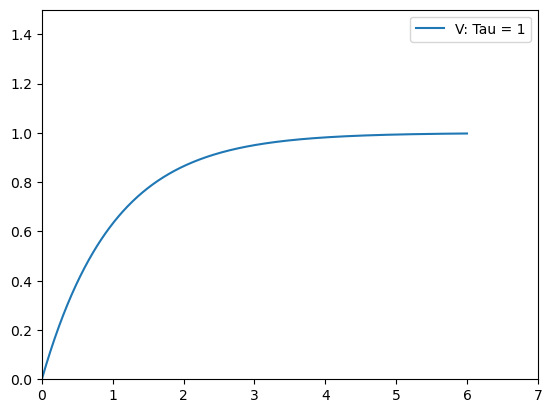

In [34]:
import math as m
import matplotlib.pyplot as plt

def V(t): #using a def function to create V(t)
    return 1-np.exp(-t)
t = np.linspace(0, 6, 600) #creating an array that represents the doamin of my function
a = V(t)
plt.plot(t, a, label='V: Tau = 1')
plt.xlim(0,7) #changing the bounds of my graph to best fit the function
plt.ylim(0,1.5)
plt.legend()

3b\. Now make five different arrays (V1, V2, V3, etc) using different values of $\tau$.  Plot them all on the same axes.   Change the colors and line styles to aid the reader, and add a legend.

(0.0, 1.5)

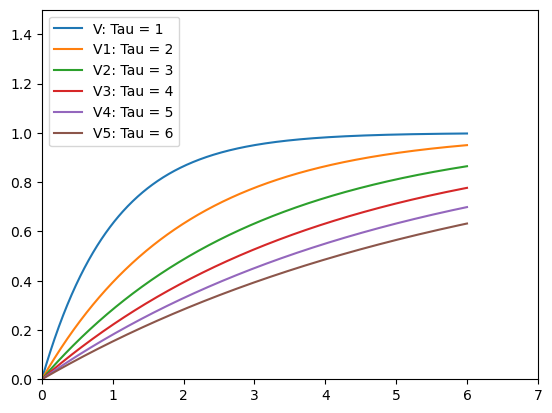

In [32]:
t = np.linspace(0, 6, 600)

def V(t):
    return 1-np.exp(-t) #Tau = 1
a = V(t)
plt.plot(t, a, label='V: Tau = 1')
def V1(t):
    return 1-np.exp(-t/2) #Tau = 2
b = V1(t)
plt.plot(t, b, label='V1: Tau = 2')

def V2(t):
    return 1-np.exp(-t/3) #Tau = 3
c = V2(t)
plt.plot(t, c, label='V2: Tau = 3')

def V3(t):
    return 1-np.exp(-t/4) #Tau = 4
d = V3(t)
plt.plot(t, d, label='V3: Tau = 4')

def V4(t):
    return 1-np.exp(-t/5) #Tau = 5
e = V4(t)
plt.plot(t, e, label='V4: Tau = 5')

def V5(t):
    return 1-np.exp(-t/6) #Tau = 6
f = V5(t)
plt.plot(t, f, label='V5: Tau = 6')

plt.legend()

plt.xlim(0,7)
plt.ylim(0,1.5)

3c\. Add the empirical data of novickA to your plot of V(t) trials.  Do not connect the data points with lines. From your observations (and some trial and error), determine the best value of $\tau$ to fit the empirical data.  (You can use curve-fitting tools if you want, but trial and error is fine.) Creatze a new plot with just the empirical data and the best fit equation.

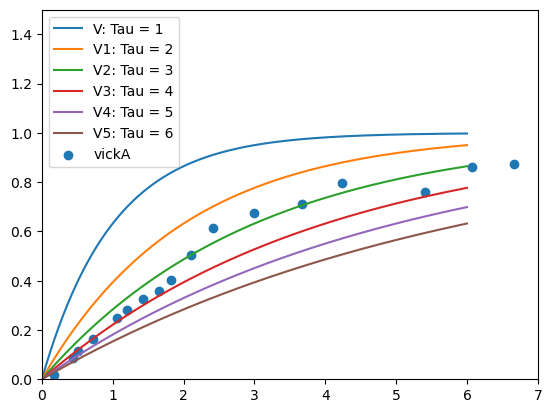

In [39]:
t = np.linspace(0, 6, 600)

def V(t):
    return 1-np.exp(-t) #Tau = 1
a = V(t)
plt.plot(t, a, label='V: Tau = 1')
def V1(t):
    return 1-np.exp(-t/2) #Tau = 2
b = V1(t)
plt.plot(t, b, label='V1: Tau = 2')

def V2(t):
    return 1-np.exp(-t/3) #Tau = 3
c = V2(t)
plt.plot(t, c, label='V2: Tau = 3')

def V3(t):
    return 1-np.exp(-t/4) #Tau = 4
d = V3(t)
plt.plot(t, d, label='V3: Tau = 4')

def V4(t):
    return 1-np.exp(-t/5) #Tau = 5
e = V4(t)
plt.plot(t, e, label='V4: Tau = 5')

def V5(t):
    return 1-np.exp(-t/6) #Tau = 6
f = V5(t)
plt.plot(t, f, label='V5: Tau = 6')

plt.xlim(0,7)
plt.ylim(0,1.5)

r = np.load('vickA.npy')

#the following are lists of the x and y values from vickA
vickA_x_values = [0.1699, 0.4426, 0.5111, 0.7156, 1.0564, 1.2041, 1.4311, 1.6465, 1.8283, 2.1119, 2.4182, 2.997, 3.6763, 4.2308, 5.407, 6.0646, 6.6638]
vickA_y_values = [0.019, 0.0855, 0.1164, 0.1639, 0.247, 0.2803, 0.3278, 0.3563, 0.4038, 0.5059, 0.6152, 0.6746, 0.7126, 0.7981, 0.7601, 0.8599, 0.8741]

plt.scatter(vickA_x_values, vickA_y_values, label='vickA')

plt.legend()

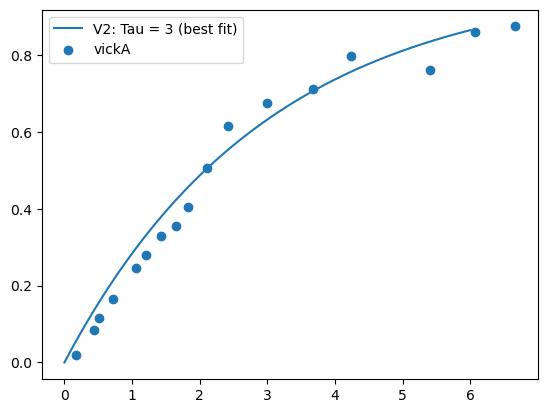

In [40]:
t = np.linspace(0, 6, 600)

def V2(t):
    return 1-np.exp(-t/3) #Tau = 3
c = V2(t)
plt.plot(t, c, label='V2: Tau = 3 (best fit)')

plt.scatter(vickA_x_values, vickA_y_values, label='vickA')

plt.legend()

3d\. Using the $\tau$ determined in part c and A = 1, plot W(t) for 0 < t < 10.

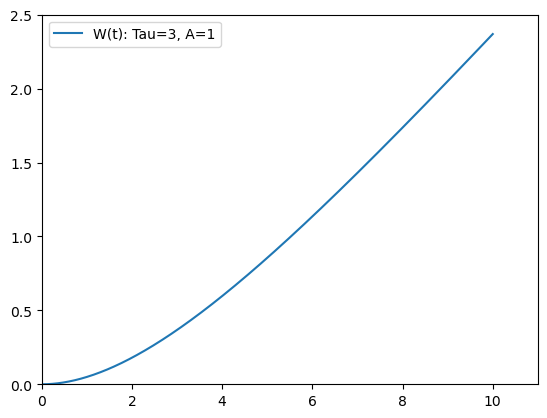

In [60]:
def W(t): #using a def function to create W(t)
    return np.exp(-t/3)-1+(t/3)

t = np.linspace(0, 10, 600) #creating an array that represents the doamin of my function
m = W(t)

plt.plot(t, m, label='W(t): Tau=3, A=1')

plt.xlim(0,11) #changing the bounds of my graph to best fit the function
plt.ylim(0,2.5)
plt.legend()

3e\. Now make five different arrays (W1, W2, W3, etc) using different values of A and $\tau$.  Plot them all on the same axes.   Change the colors and line styles to aid the reader, and add a legend.

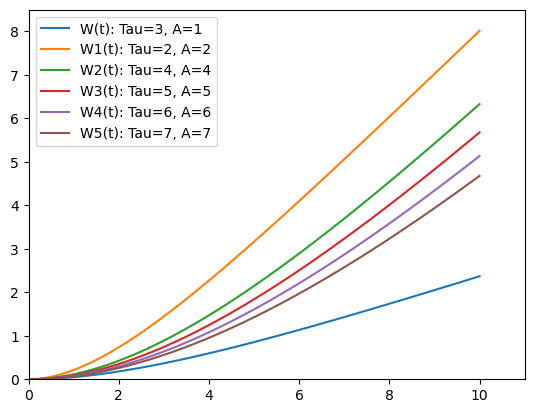

In [54]:
t = np.linspace(0, 10, 600)

def W(t):
    return np.exp(-t/3)-1+t/3
a = W(t)
plt.plot(t, a, label='W(t): Tau=3, A=1')

def W1(t):
    return 2*np.exp(-t/2)-2+2*t/2
b = W1(t)
plt.plot(t, b, label='W1(t): Tau=2, A=2')

def W2(t):
    return 4*np.exp(-t/4)-4+4*t/4
c = W2(t)
plt.plot(t, c, label='W2(t): Tau=4, A=4')

def W3(t):
    return 5*np.exp(-t/5)-5+5*t/5
d = W3(t)
plt.plot(t, d, label='W3(t): Tau=5, A=5')

def W4(t):
    return 6*np.exp(-t/6)-6+6*t/6
e = W4(t)
plt.plot(t, e, label='W4(t): Tau=6, A=6')

def W5(t):
    return 7*np.exp(-t/7)-7+7*t/7
f = W5(t)
plt.plot(t, f, label='W5(t): Tau=7, A=7')

plt.xlim(0,11)
plt.ylim(0,8.5)

plt.legend()

3f\. Throw away all of the novickB data with time values greater than 10 hours. Add the truncated empirical data of novickB to your plot of W(t) trials.  Do not connect the data points with lines. From your observations (and some trial and error), determine the best value of A to fit the empirical data.  Create a new plot with just the empirical data and the best fit equation. 

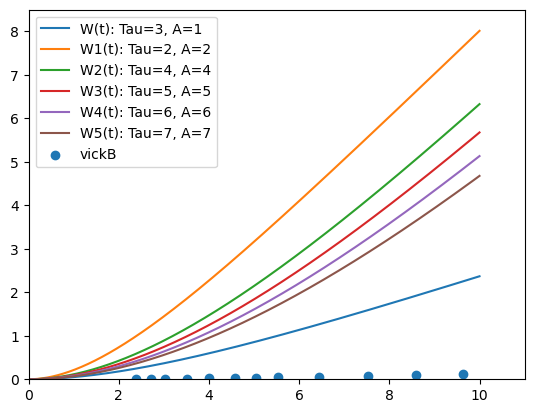

In [59]:
t = np.linspace(0, 10, 600)

def W(t):
    return np.exp(-t/3)-1+t/3
a = W(t)
plt.plot(t, a, label='W(t): Tau=3, A=1')

def W1(t):
    return 2*np.exp(-t/2)-2+2*t/2
b = W1(t)
plt.plot(t, b, label='W1(t): Tau=2, A=2')

def W2(t):
    return 4*np.exp(-t/4)-4+4*t/4
c = W2(t)
plt.plot(t, c, label='W2(t): Tau=4, A=4')

def W3(t):
    return 5*np.exp(-t/5)-5+5*t/5
d = W3(t)
plt.plot(t, d, label='W3(t): Tau=5, A=5')

def W4(t):
    return 6*np.exp(-t/6)-6+6*t/6
e = W4(t)
plt.plot(t, e, label='W4(t): Tau=6, A=6')

def W5(t):
    return 7*np.exp(-t/7)-7+7*t/7
f = W5(t)
plt.plot(t, f, label='W5(t): Tau=7, A=7')

plt.xlim(0,11)
plt.ylim(0,8.5)

r = np.load('vickB.npy')

vickB_x_values = [2.38320, 2.72300, 3.03580, 3.51770, 4.00140, 4.56920, 5.05280, 5.53580, 6.44580, 7.52620, 8.58090, 9.63180]
vickB_y_values =[1.09000e-02, 9.34290e-03, 1.46000e-02, 1.45000e-02, 2.42000e-02, 2.86000e-02, 3.76000e-02, 4.35000e-02, 5.92000e-02, 7.64000e-02, 1.07100e-01, 1.18200e-01]

plt.scatter(vickB_x_values, vickB_y_values, label='vickB')

plt.legend()

3g\. Comment on the ability of the two equations to model the empirical data. Were you able to achieve a good fit? If you used curve-fitting tools, comment on their effectiveness.

In [ ]:
#The V(t) equation that I compared to vickA was actually a very good fit to the empirical data. 
#However, the W(t) equation was far off from the empirical data
#I did not use any curve-fitting tools

Please list all of your sources here:

#An Upper classman helped me get rid of the outliers in the leaderboard probelm
#https://sentry.io/answers/change-a-column-type-in-a-dataframe-in-python-pandas/
#I used this to figure out how to sum my values in the leaderboard, before I got errors saying my leaderboard included strings https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
#helped me with the plotting problems https://www.w3schools.com/python/pandas/pandas_plotting.asp
#Prof. Widder helped me figure out the code for 3a which I applied to the following problems
#scatter plots: https://www.w3schools.com/python/matplotlib_scatter.asp